(chapter8_part1)=


## Decision Trees in Regression

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 


This notebook is a supplement for *Chapter 8. Decision Trees* of **Machine Learning For Everyone** book.

## 1. Required Libraries, Data & Variables

Let's import the data and have a look at it:

In [1]:
import pandas as pd
%config InlineBackend.figure_format = 'retina' #to make sharper and prettier plots

# Data from the provided table
data = {
    'Day': list(range(1, 13)),
    'Temperature': ['Hot', 'Hot', 'Hot', 'Cold', 'Cold', 'Cold', 'Cold', 'Hot', 'Hot', 'Cold', 'Cold', 'Cold'],
    'Humidity': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'High', 'Normal'],
    'Outlook': ['Sunny', 'Sunny', 'Rain', 'Rain', 'Rain', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Rain', 'Rain', 'Sunny'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Golf Hours Played': [25, 30, 42, 32, 23, 35, 38, 43, 48, 12, 24, 22]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Day,Temperature,Humidity,Outlook,Wind,Golf Hours Played
0,1,Hot,High,Sunny,Weak,25
1,2,Hot,High,Sunny,Strong,30
2,3,Hot,High,Rain,Weak,42
3,4,Cold,Normal,Rain,Weak,32
4,5,Cold,Normal,Rain,Strong,23
5,6,Cold,High,Sunny,Weak,35
6,7,Cold,Normal,Sunny,Weak,38
7,8,Hot,Normal,Rain,Weak,43
8,9,Hot,Normal,Sunny,Strong,48
9,10,Cold,High,Rain,Strong,12


## 2. Preprocessing Dataframe

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Temperature'] = label_encoder.fit_transform(df['Temperature'])
df['Humidity'] = label_encoder.fit_transform(df['Humidity'])
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
df['Wind'] = label_encoder.fit_transform(df['Wind'])

Let's look at our dataset after preprocessing:

In [4]:
df

,Day,Temperature,Humidity,Outlook,Wind,Golf Hours Played
0,1,1,0,1,1,25
1,2,1,0,1,0,30
2,3,1,0,0,1,42
3,4,0,1,0,1,32
4,5,0,1,0,0,23
5,6,0,0,1,1,35
6,7,0,1,1,1,38
7,8,1,1,0,1,43
8,9,1,1,1,0,48
9,10,0,0,0,0,12


## 3. Training a Decision Tree with SDR

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

#### 3.1. Splitting into X and y

In [6]:
# Features and target variable
X = df[['Temperature', 'Humidity', 'Outlook', 'Wind']]
y = df['Golf Hours Played']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3.2. Building the Decision Tree Regressor

In [7]:
# Standard deviation reduction isn't a direct option in scikit-learn, so we use the default "mse" which is mean squared error
tree_regressor = DecisionTreeRegressor(criterion='squared_error', random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#### 3.3. Predict and Evaluate the Model

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
y_pred = tree_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 199.5


#### 3.4. Visualize the Tree (optional)

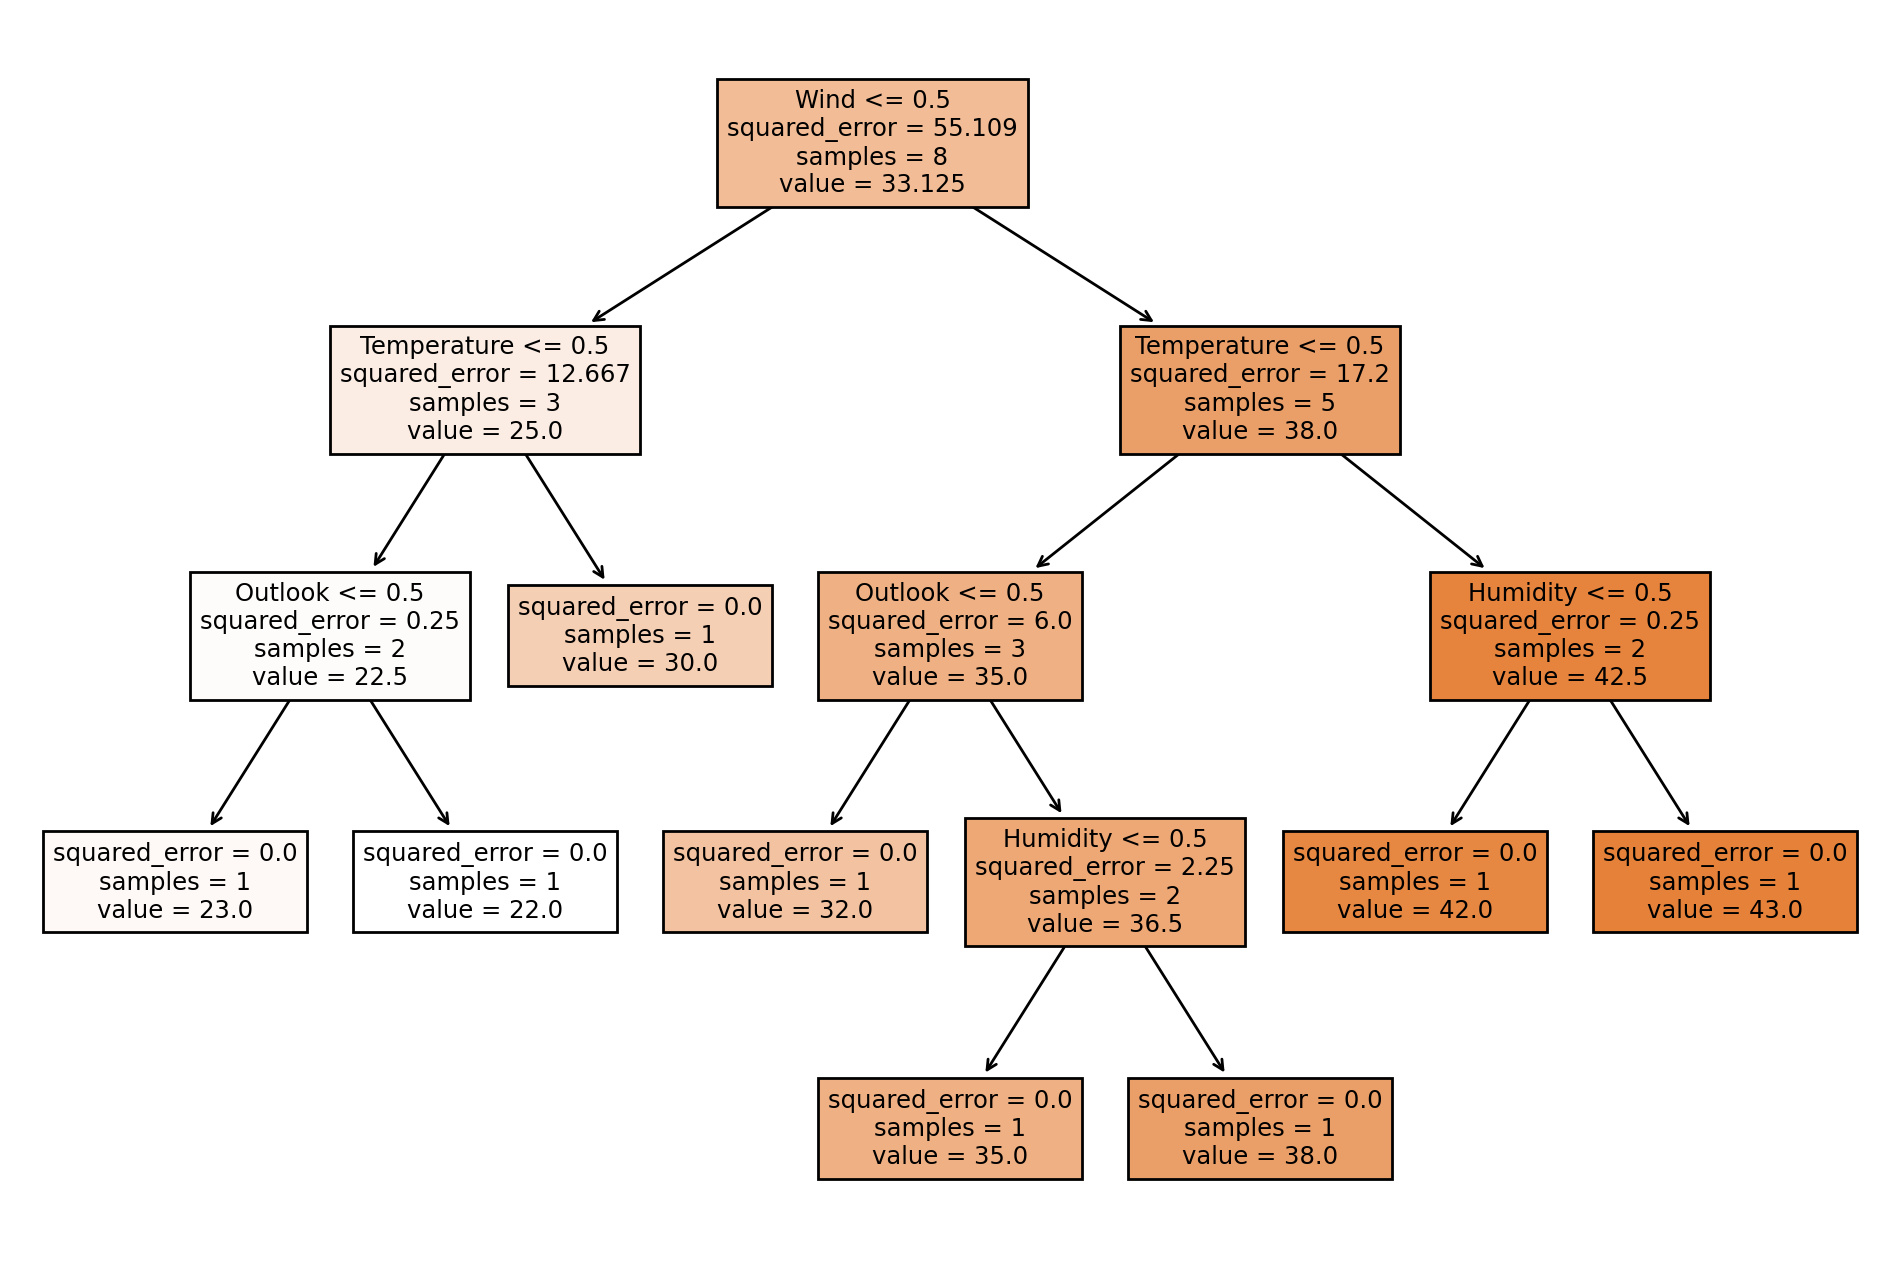

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree_regressor, filled=True, feature_names=['Temperature', 'Humidity', 'Outlook', 'Wind'])

# Visualize the decision tree
plt.show()